In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

#Load from csv file
file_path = 'database.csv'

#read into a DataFrame
all_data = pd.read_csv(file_path)

#Display the DataFrame
print(all_data)


          id       date          city state                          type  \
0      63415  4/12/2024    Louisville    KY              Extremist Murder   
1      63374  3/31/2024      Lansdale    PA  White Supremacist Propaganda   
2      63352  3/30/2024         Boise    ID  White Supremacist Propaganda   
3      62562  3/29/2024    Sweetwater    WY  White Supremacist Propaganda   
4      62724  3/29/2024   Wallingford    CT  White Supremacist Propaganda   
...      ...        ...           ...   ...                           ...   
52828   2709    02/2015          York    SC         Terrorist Plot/Attack   
52829   2332  1/26/2015   Springfield    MO     Extremist/Police Shootout   
52830     74  1/17/2015  Apple Valley    MN              Extremist Murder   
52831   1558    01/2015         Miami    FL         Terrorist Plot/Attack   
52832    913   1/1/2015    Fort Worth    TX              Extremist Murder   

                             ideology  subideology                     grou

In [2]:
# Print column titles
column_names = all_data.columns.tolist()
print(column_names)

['id', 'date', 'city', 'state', 'type', 'ideology', 'subideology', 'group', 'description', 'image']


In [3]:
# Print all possible entries in "type"



type_options = set(all_data['type'])

print(type_options)

# Unique Types: Antismitic Incident, Extremist Murder, Anti-LGBTQ+ Incident, White Supremacist, Terrorist Plot/Attack, 

{'White Supremacist Event', 'Extremist Murder;Extremist/Police Shootout;Terrorist Plot/Attack', 'Extremist Murder;Terrorist Plot/Attack', 'Anti-LGBTQ+ Incident:Harassment;Antisemitic Incident:Harassment;White Supremacist Propaganda', 'Extremist/Police Shootout;Terrorist Plot/Attack', 'Antisemitic Incident:Vandalism;Terrorist Plot/Attack', 'Antisemitic Incident:Harassment;White Supremacist Propaganda', 'Anti-LGBTQ+ Incident:Vandalism;Antisemitic Incident:Vandalism;White Supremacist Propaganda', 'Antisemitic Incident:Harassment;White Supremacist Event', 'Extremist Murder', 'Antisemitic Incident:Vandalism', 'Antisemitic Incident:Assault;Extremist/Police Shootout;Terrorist Plot/Attack', 'Antisemitic Incident:Harassment;Terrorist Plot/Attack', 'Terrorist Plot/Attack', 'Anti-LGBTQ+ Incident:Vandalism;Antisemitic Incident:Vandalism', 'Extremist Murder;Extremist/Police Shootout', 'Antisemitic Incident:Assault;Extremist Murder;Terrorist Plot/Attack', 'Antisemitic Incident:Assault;Extremist Murd

In [34]:

antisemitic_incidents = all_data[all_data['type'].str.contains("Antisemitic Incident")].copy()
print(antisemitic_incidents.shape[0])

extremist_incidents = all_data[all_data['type'].str.contains("Extremist")].copy()
print(extremist_incidents.shape[0])

antiLGBTQPlus_incidents = all_data[all_data['type'].str.contains("LGBTQ+")].copy()
print(antiLGBTQPlus_incidents.shape[0])

white_supremacist_incidents = all_data[all_data['type'].str.contains("White Supremacist")].copy()
print(white_supremacist_incidents.shape[0])

terrorist_incidents = all_data[all_data['type'].str.contains("Terrorist")].copy()
print(terrorist_incidents.shape[0])



24552
271
1036
30455
188


In [38]:
#Get per year
antisemitic_incidents['date'] = pd.to_datetime(antisemitic_incidents['date'], format='%m/%d/%Y', errors='coerce')

# Filter out the successfully converted dates
valid_dates = antisemitic_incidents.dropna(subset=['date'])

# Handle the remaining dates with the second format ("%m/%Y")
remaining_dates = antisemitic_incidents.loc[antisemitic_incidents['date'].isna(), 'date']
remaining_dates = pd.to_datetime(remaining_dates, format='%m/%Y', errors='coerce')

# Concatenate the valid dates and the successfully converted remaining dates
all_dates = pd.concat([valid_dates, remaining_dates], axis=0)

data_2016 = antisemitic_incidents[antisemitic_incidents['date'].dt.year == 2016].copy()
print("Number of entries in 2016:", data_2016.shape[0])

data_2017 = antisemitic_incidents[antisemitic_incidents['date'].dt.year == 2017].copy()
print("Number of entries in 2017:", data_2017.shape[0])

data_2018 = antisemitic_incidents[antisemitic_incidents['date'].dt.year == 2018].copy()
print("Number of entries in 2018:", data_2018.shape[0])

data_2019 = antisemitic_incidents[antisemitic_incidents['date'].dt.year == 2019].copy()
print("Number of entries in 2019:", data_2019.shape[0])

data_2020 = antisemitic_incidents[antisemitic_incidents['date'].dt.year == 2020].copy()
print("Number of entries in 2020:", data_2020.shape[0])

data_2021 = antisemitic_incidents[antisemitic_incidents['date'].dt.year == 2021].copy()
print("Number of entries in 2021:", data_2021.shape[0])

data_2022 = antisemitic_incidents[antisemitic_incidents['date'].dt.year == 2022].copy()
print("Number of entries in 2022:", data_2022.shape[0])

data_2023 = antisemitic_incidents[antisemitic_incidents['date'].dt.year == 2023].copy()
print("Number of entries in 2023:", data_2023.shape[0])

data_2024 = antisemitic_incidents[antisemitic_incidents['date'].dt.year == 2024].copy()
print("Number of entries in 2024:", data_2024.shape[0])


Number of entries in 2016: 0
Number of entries in 2017: 46
Number of entries in 2018: 138
Number of entries in 2019: 223
Number of entries in 2020: 422
Number of entries in 2021: 284
Number of entries in 2022: 3616
Number of entries in 2023: 8873
Number of entries in 2024: 0


In [2]:
print(df)

<module 'pandas' from '/Users/dayanovich/anaconda3/lib/python3.11/site-packages/pandas/__init__.py'>


In [50]:
def count_entries_by_year(incident_df, year):
    # Convert dates to datetime with the first format ("%m/%d/%Y")
    incident_df['date'] = pd.to_datetime(incident_df['date'], format='%m/%d/%Y', errors='coerce')

    # Filter out the successfully converted dates
    valid_dates = incident_df.dropna(subset=['date'])

    # Handle the remaining dates with the second format ("%m/%Y")
    remaining_dates = incident_df.loc[incident_df['date'].isna(), 'date']
    remaining_dates = pd.to_datetime(remaining_dates, format='%m/%Y', errors='coerce')

    # Concatenate the valid dates and the successfully converted remaining dates
    all_dates = pd.concat([valid_dates, remaining_dates], axis=0)

    # Filter data for the specified year
    data_year = all_dates[all_dates['date'].dt.year == year]

    # Return the number of entries for the specified year
    return data_year.shape[0]



print(count_entries_by_year(antisemitic_incidents, 2015))
print(count_entries_by_year(antisemitic_incidents, 2016))
print(count_entries_by_year(antisemitic_incidents, 2017))
print(count_entries_by_year(antisemitic_incidents, 2018))
print(count_entries_by_year(antisemitic_incidents, 2019))
print(count_entries_by_year(antisemitic_incidents, 2020))
print(count_entries_by_year(antisemitic_incidents, 2021))
print(count_entries_by_year(antisemitic_incidents, 2022))
print(count_entries_by_year(antisemitic_incidents, 2023))
print(count_entries_by_year(antisemitic_incidents, 2024))
print(antisemitic_incidents.shape[0])






0
0
46
138
223
422
284
3616
8873
0
24552


In [59]:
import pandas as pd

# Iterate over each cell in the 'date' column
for index, date_value in antisemitic_incidents['date'].items():
    # Check if the date is not NaT
    if not pd.isnull(date_value):
        # Convert date value to MM/DD/YYYY format
        updated_date = pd.to_datetime(date_value, errors='coerce').strftime('%m/%d/%Y')

        # Check if the converted date value is different from the original and not already in MM/DD/YYYY format
        if updated_date != date_value and date_value.strftime('%m/%d/%Y') != date_value:
            # Print the corresponding 'id' and original 'date' value
            print("Updating date format for ID:", antisemitic_incidents.at[index, 'id'])
            print("Original date:", date_value)

            # Update the date format to MM/DD/YYYY
            antisemitic_incidents.at[index, 'date'] = updated_date
            print("Updated date:", updated_date)
    else:
        #NEED A MISSING DATA APPROACH. 
        print("Skipping NaT value at index", index)

print(count_entries_by_year(antisemitic_incidents, 2015))
print(count_entries_by_year(antisemitic_incidents, 2016))
print(count_entries_by_year(antisemitic_incidents, 2017))
print(count_entries_by_year(antisemitic_incidents, 2018))
print(count_entries_by_year(antisemitic_incidents, 2019))
print(count_entries_by_year(antisemitic_incidents, 2020))
print(count_entries_by_year(antisemitic_incidents, 2021))
print(count_entries_by_year(antisemitic_incidents, 2022))
print(count_entries_by_year(antisemitic_incidents, 2023))
print(count_entries_by_year(antisemitic_incidents, 2024))
print(antisemitic_incidents.shape[0])


Updating date format for ID: 54426
Original date: 2023-12-31 00:00:00
Updated date: 12/31/2023
Updating date format for ID: 54432
Original date: 2023-12-31 00:00:00
Updated date: 12/31/2023
Updating date format for ID: 54433
Original date: 2023-12-31 00:00:00
Updated date: 12/31/2023
Updating date format for ID: 62390
Original date: 2023-12-31 00:00:00
Updated date: 12/31/2023
Updating date format for ID: 55018
Original date: 2023-12-31 00:00:00
Updated date: 12/31/2023
Updating date format for ID: 55026
Original date: 2023-12-31 00:00:00
Updated date: 12/31/2023
Updating date format for ID: 55032
Original date: 2023-12-31 00:00:00
Updated date: 12/31/2023
Updating date format for ID: 55033
Original date: 2023-12-31 00:00:00
Updated date: 12/31/2023
Updating date format for ID: 55035
Original date: 2023-12-31 00:00:00
Updated date: 12/31/2023
Updating date format for ID: 58597
Original date: 2023-12-31 00:00:00
Updated date: 12/31/2023
Updating date format for ID: 58603
Original date: 

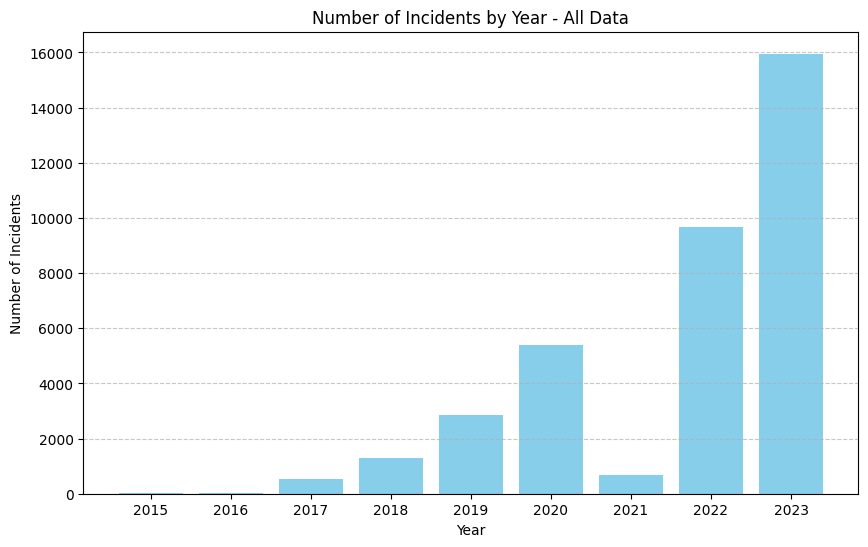

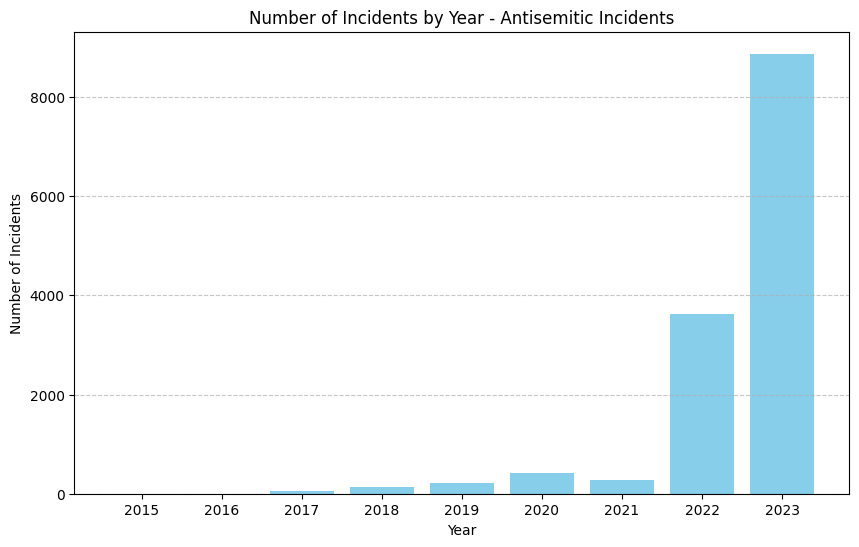

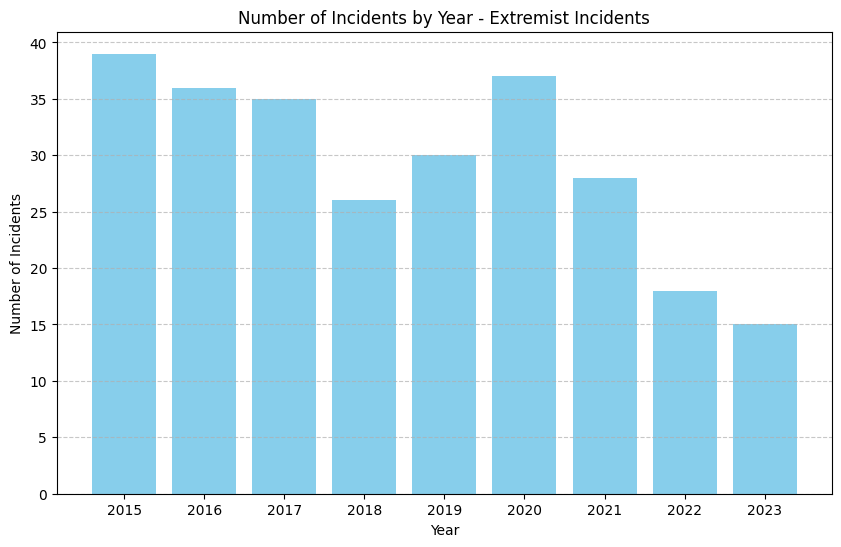

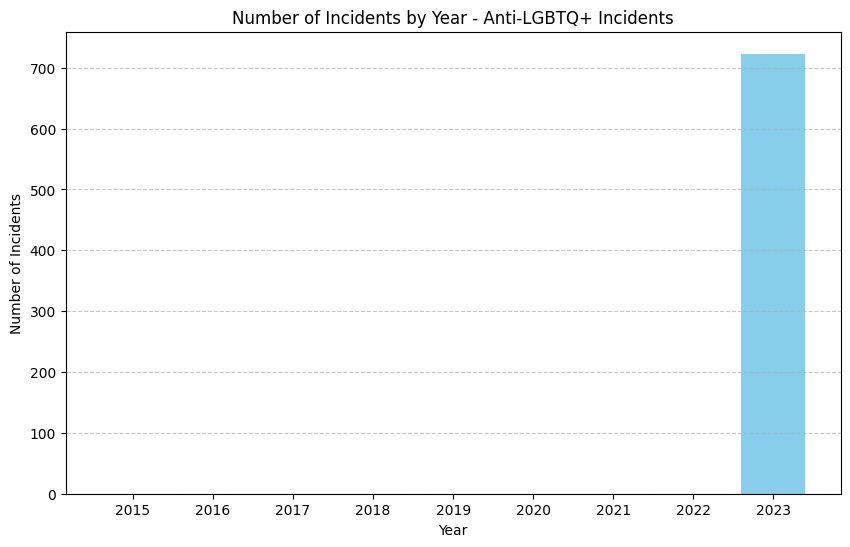

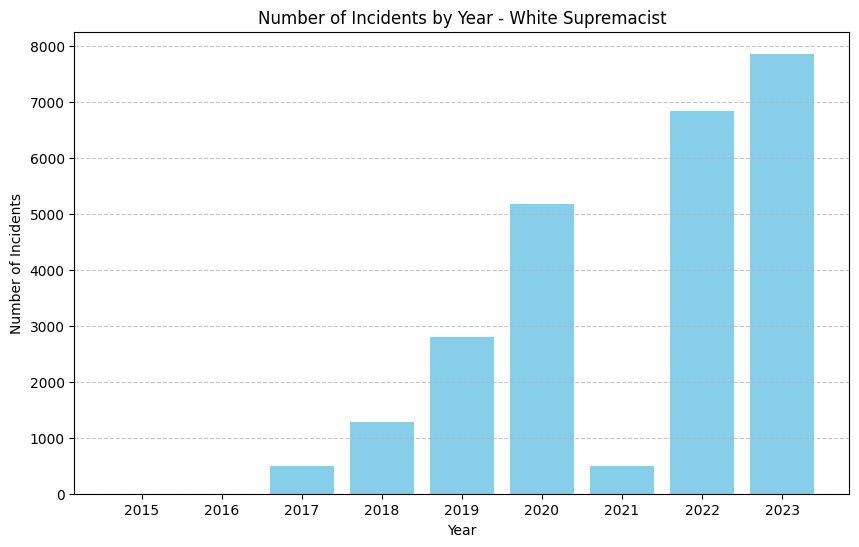

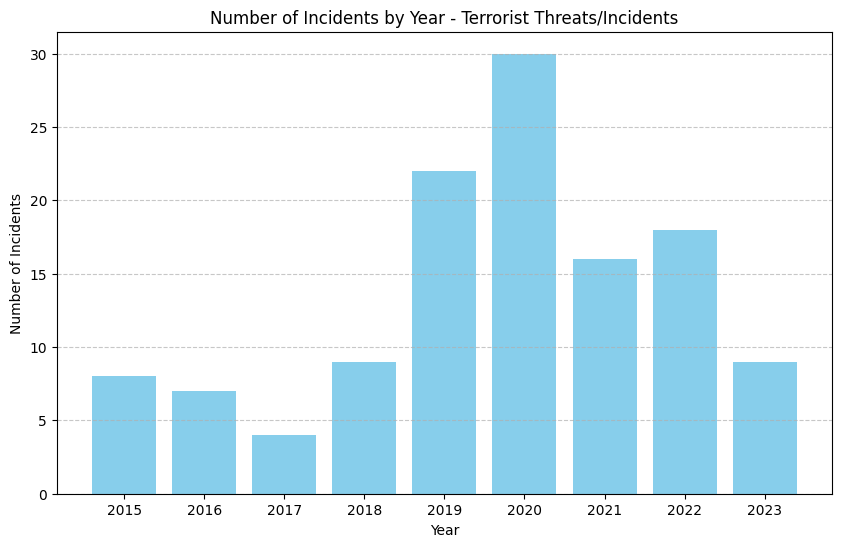

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to count incidents by year
def count_entries_by_year(incident_df, year):
    # Convert dates to datetime with multiple formats
    incident_df['date'] = pd.to_datetime(incident_df['date'], errors='coerce')
    
    # Filter data for the specified year
    data_year = incident_df[incident_df['date'].dt.year == year]

    # Return the number of entries for the specified year
    return data_year.shape[0]



def plot_incidents_by_year(incident_df, df_name):
    # Define years and corresponding counts
    years = range(2015, 2024)
    counts = [count_entries_by_year(incident_df, year) for year in years]

    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(years, counts, color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Incidents')
    plt.title('Number of Incidents by Year - {}'.format(df_name))
    plt.xticks(years)  # Set x-axis ticks to be the years
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
    plt.show()

plot_incidents_by_year(all_data, "All Data")
plot_incidents_by_year(antisemitic_incidents, "Antisemitic Incidents")
plot_incidents_by_year(extremist_incidents, "Extremist Incidents")
plot_incidents_by_year(antiLGBTQPlus_incidents, "Anti-LGBTQ+ Incidents")
plot_incidents_by_year(white_supremacist_incidents, "White Supremacist")
plot_incidents_by_year(terrorist_incidents, "Terrorist Threats/Incidents")




NameError: name 'antisemitic_incidents' is not defined